In [2]:
import pandas as pd

In [4]:
path_to_file = "./notExerciese.csv"
data = []

In [27]:
# csv 파일에서 읽어옴 기간은 어차피 전체가 2017년 데이터
df = pd.read_csv(path_to_file).drop(columns=["기간"])

# 엑셀의 머지된 셀을 csv로 받아온 데이터에서는 ffill로 채워줌
df["대분류"] = df["대분류"].ffill()

# 원하는 데이터만 슬라이싱
df = df.set_index("대분류").loc["서울시":"소득별"]

# column 순서 재배치
df = df[
    [
        "분류",
        "운동을 할 충분한 시간이 없어서",
        "운동을 싫어해서",
        "함께 운동을 할 사람이 없어서",
        "운동을 할 만한 장소가 없어서",
        "기타",
    ]
]
df

,분류,운동을 할 충분한 시간이 없어서,운동을 싫어해서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,기타
대분류,,,,,,
서울시,NaN,49.7,34.7,8.1,5.8,1.7
성별,남자,55.2,29.8,7.9,5.5,1.6
성별,여자,45.0,38.8,8.3,6.0,1.8
연령별,10대,55.7,32.2,6.1,5.6,0.3
연령별,20대,54.8,32.9,6.9,5.2,0.1
연령별,30대,58.1,31.6,5.5,4.6,0.2
연령별,40대,57.7,29.4,6.8,5.2,1
연령별,50대,50.1,32.2,9.2,7.2,1.4
연령별,60대 이상,27.5,46.8,12.8,6.9,6


In [69]:
# 서울시 전체 데이터
df_total = df.loc["서울시"].drop("분류")

# 성별별 데이터
df_sex = df.loc["성별"].set_index("분류")

# 연령별 데이터
df_age = df.loc["연령별"].set_index("분류")

# 학력별 데이터
df_education = df.loc["학력별"].set_index("분류")

# 소득별 데이터
df_income = df.loc["소득별"].set_index("분류")

In [43]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams["font.family"] = "Malgun Gothic"

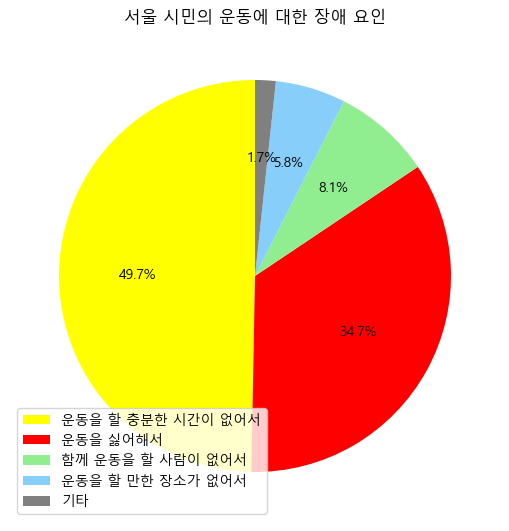

In [104]:
plt.style.use("_mpl-gallery-nogrid")
labels = df_total.index
colors = ["yellow", "red", "lightgreen", "lightskyblue", "gray"]
plt.figure(figsize=(5, 5))
plt.pie(df_total, autopct="%1.1f%%", startangle=90, colors=colors)
plt.legend(labels)
plt.title("서울 시민의 운동에 대한 장애 요인")
plt.show()

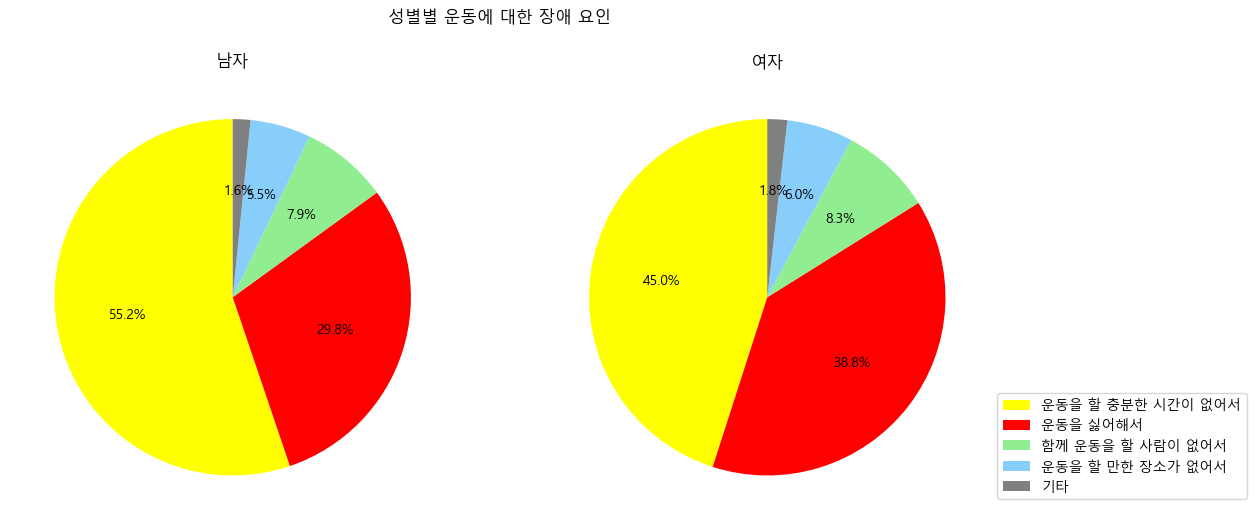

In [105]:
# 남자와 여자의 데이터를 나누기기
df_male = df_sex.loc["남자"]
df_female = df_sex.loc["여자"]

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.pie(df_male, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("남자")
plt.subplot(122)
plt.pie(df_female, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("여자")
plt.legend(labels, bbox_to_anchor=(1, 0.3))
plt.suptitle("성별별 운동에 대한 장애 요인")
plt.show()

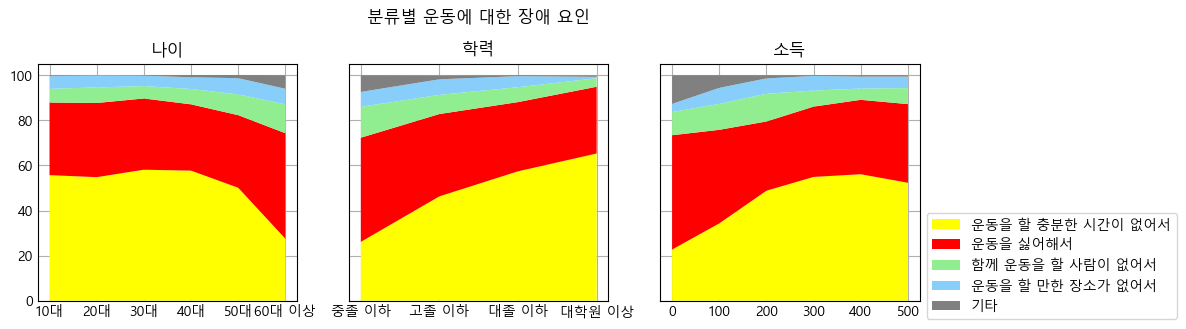

In [151]:
plt.style.use("_mpl-gallery")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

# 나이별 데이터
x = df_age.index
y = df_age.T.values.astype(float)
ax1.stackplot(x, y, colors=colors)
ax1.set_title("나이")

# 학력별 데이터
x = df_education.index
y = df_education.T.values.astype(float)
ax2.stackplot(x, y, colors=colors)
ax2.set_title("학력")

# 소득별 데이터
x = np.arange(0, 600, 100)
y = df_income.T.values.astype(float)
ax3.stackplot(x, y, colors=colors)
ax3.set_title("소득")
plt.suptitle("분류별 운동에 대한 장애 요인")
plt.legend(labels, bbox_to_anchor=(1, 0.4))
fig.subplots_adjust(top=0.8)
plt.show()

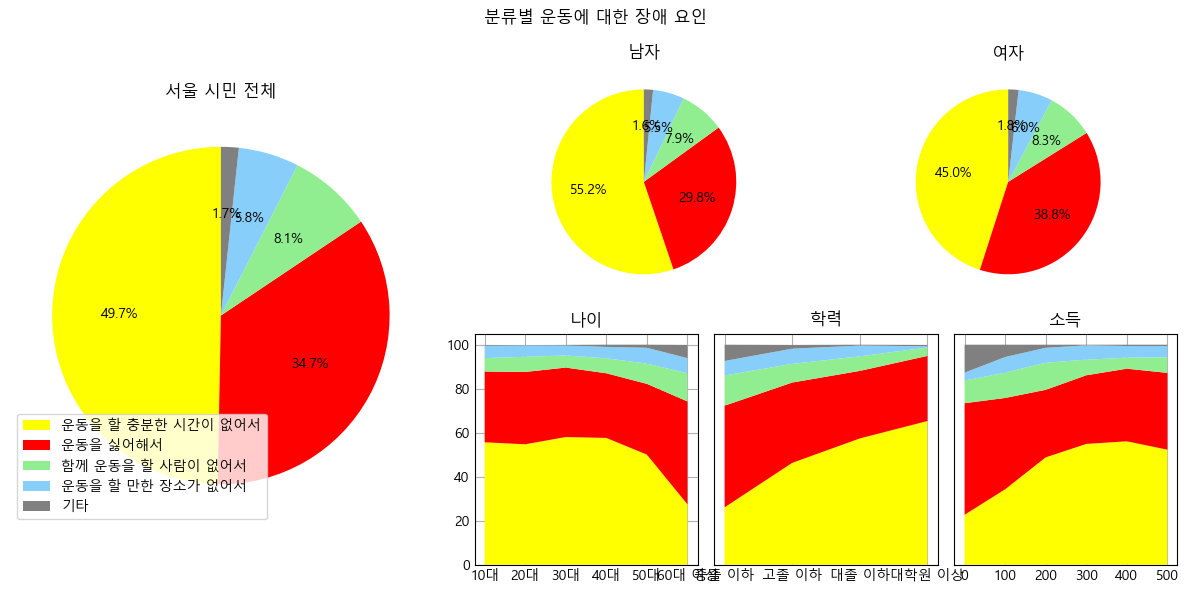

In [242]:
import matplotlib.gridspec as gridspec

# 한번에 출력하기 위해서 grid로 나누었다

# gridspec과 subgridspec을 이용해서 subplot을 나누어 주었다.
fig = plt.figure(figsize=(12, 6))
plt.style.use("_mpl-gallery-nogrid")
gs = gridspec.GridSpec(2, 2, width_ratios=[0.6, 1])
ax1 = fig.add_subplot(gs[:2, 0])
sub_gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0, 1:2])
ax2 = fig.add_subplot(sub_gs1[0, 0])
ax3 = fig.add_subplot(sub_gs1[0, 1])
plt.style.use("_mpl-gallery")
sub_gs2 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1, 1:2])
ax4 = fig.add_subplot(sub_gs2[0, 0])
ax5 = fig.add_subplot(sub_gs2[0, 1])
ax6 = fig.add_subplot(sub_gs2[0, 2])

# 서울 시민 전체 데이터
plt.suptitle("분류별 운동에 대한 장애 요인")
ax1.pie(df_total, autopct="%1.1f%%", startangle=90, colors=colors)
ax1.set_title("서울 시민 전체")
ax1.legend(labels, loc="lower left")

# 성별 데이터
ax2.pie(df_male, autopct="%1.1f%%", startangle=90, colors=colors)
ax2.set_title("남자")
ax3.pie(df_female, autopct="%1.1f%%", startangle=90, colors=colors)
ax3.set_title("여자")

# 나이별 데이터
x = df_age.index
y = df_age.T.values.astype(float)
ax4.stackplot(x, y, colors=colors)
ax4.set_title("나이")

# 학력별 데이터
x = df_education.index
y = df_education.T.values.astype(float)
ax5.stackplot(x, y, colors=colors)
ax5.set_title("학력")
ax5.set_yticks([])

# 소득별 데이터
x = np.arange(0, 600, 100)
y = df_income.T.values.astype(float)
ax6.stackplot(x, y, colors=colors)
ax6.set_title("소득")
ax6.set_xticks(np.arange(0, 600, 100))
ax6.set_yticks([])


plt.tight_layout()
plt.show()